# Data Science - Assignment 2

Dataset: <b>Heart Disease</b>

Thomas Bründl

se21m032

# Data Description

1. (age) : age in years    
2. (sex) : sex (1 = male; 0 = female)
3. (cp) : chest pain type <br>
            &emsp; &emsp; Value 1: typical angina <br>
            &emsp; &emsp; Value 2: atypical angina <br>
            &emsp; &emsp; Value 3: non-anginal pain <br>
            &emsp; &emsp; Value 4: asymptomatic <br> 
4. (trestbps) : resting blood pressure (in mm Hg on admission to the 
        hospital)
5. (chol) : serum cholestoral in mg/dl     
6. (fbs) : (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)    
7. (restecg) : resting electrocardiographic results <br>
        &emsp; &emsp; Value 0: normal <br> 
        &emsp; &emsp; Value 1: having ST-T wave abnormality (T wave inversions and/or ST
                    elevation or depression of > 0.05 mV) <br>
        &emsp; &emsp; Value 2: showing probable or definite left ventricular hypertrophy 
                    by Estes' criteria <br>
8. (thalach) : maximum heart rate achieved
9. (exang) : exercise induced angina (1 = yes; 0 = no) 
10. (oldpeak) : ST depression induced by exercise relative to rest
11. (slope) : the slope of the peak exercise ST segment <br>
        &emsp; &emsp; Value 1: upsloping <br>
        &emsp; &emsp; Value 2: flat <br>
        &emsp; &emsp; Value 3: downsloping <br>
12. (ca) : number of major vessels (0-3) colored by flourosopy     
13. (thal) : 3 = normal; 6 = fixed defect; 7 = reversable defect   
14. (num) : diagnosis of heart disease (angiographic disease status) <br>
         &emsp; &emsp; Value 0: < 50% diameter narrowing <br>
         &emsp; &emsp; Value 1: > 50% diameter narrowing <br> &emsp; &emsp; (in any major vessel: attributes 59 through 68 are vessels) <br>

# Import necessary dependencies

In [783]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Load and concat raw data

In [784]:
columnNames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

raw_data_cleveland = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', sep=',', names = columnNames)
raw_data_hungarian = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data', sep=',', names = columnNames)
raw_data_switzerland = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data', sep=',', names = columnNames)
raw_data_va = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data', sep=',', names = columnNames)

raw_data = pd.concat([raw_data_cleveland, raw_data_hungarian, raw_data_switzerland, raw_data_va])
raw_data = raw_data.sample(frac=1, random_state=42).reset_index(drop=True)

print('columns: ' + str(len(raw_data)))

columns: 920


# Show raw data

In [785]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

raw_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,36.0,1.0,2.0,120,166,0,0,180,0,0.0,?,?,?,0
1,45.0,1.0,2.0,140,224,1,0,122,0,0.0,?,?,?,0
2,48.0,1.0,4.0,160,329,0,0,92,1,1.5,2,?,?,1
3,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
4,40.0,0.0,4.0,150,392,0,0,130,0,2.0,2,?,6,1
5,65.0,0.0,3.0,155.0,269.0,0.0,0.0,148.0,0.0,0.8,1.0,0.0,3.0,0
6,34.0,1.0,1.0,140,156,0,0,180,0,0.0,?,?,?,1
7,57.0,1.0,4.0,160,0,?,0,98,1,2,2,?,7,2
8,49.0,1.0,1.0,130,0,0,1,145,0,3,2,?,?,2
9,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0,0


## Parsing data

In [786]:
data=raw_data

def parseToFloat(y):
    try:
        return float(y)
    except:
        return None

def processColumn(data, column):
    data[column] = data[column].apply(lambda value: parseToFloat(value))

for columnName in columnNames:
    processColumn(data=raw_data, column=columnName)

data['chol'] = data['chol'].apply(lambda value: None if value == 0 else value)
data['oldpeak'] = data['oldpeak'].apply(lambda value: None if value == 0 else value)

# Map description to number value

In [787]:
dataDict = {
  "age": {"catData": None},
  "sex": {"catData": {1: "Male", 0: "Female"}},
  "cp": {"catData": {1: "typical angina",2: "atypical angina", 3: "non-anginal pain", 4 : "asymptomatic" }},
  "trestbps" :  {"catData": None},
  "chol" :  {"catData": None},
  "fbs" :   {"catData": {1: "True", 0: "False"}},
  "restecg": {"catData": {0: "normal",1: "having ST-T wave abnormality", 2: "showing probable"}},
  "thalach": {"catData": None},
  "exang": {"catData": {1: "yes", 0: "no"}},
  "oldpeak": {"catData": None},
  "slope": {"catData": {1: "upsloping",2: "flat", 3: "downsloping"}},
  "ca": {"catData": None},
  "thal": {"catData": {3: "normal", 6: "fixed defect", 7: "reversable defect"}},
  "num": {"catData": {0: "< 50% diameter narrowing", 1: "> 50% diameter narrowing"}},
} 

newData = data.copy(deep=True)

def applyCatData(numData, colName):
    for key in dataDict[colName]["catData"]:
          if key == numData:
                return dataDict[colName]["catData"][key]
    return None


for colName in dataDict:
    if None != dataDict[colName]["catData"]:
        newData[colName] =  newData[colName].apply(lambda numData: applyCatData(numData, colName))


In [788]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
newData.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,36.0,Male,atypical angina,120.0,166.0,False,normal,180.0,no,NaN,None,NaN,None,< 50% diameter narrowing
1,45.0,Male,atypical angina,140.0,224.0,True,normal,122.0,no,NaN,None,NaN,None,< 50% diameter narrowing
2,48.0,Male,asymptomatic,160.0,329.0,False,normal,92.0,yes,1.5,flat,NaN,None,> 50% diameter narrowing
3,59.0,Male,asymptomatic,164.0,176.0,True,showing probable,90.0,no,1.0,flat,2.0,fixed defect,None
4,40.0,Female,asymptomatic,150.0,392.0,False,normal,130.0,no,2.0,flat,NaN,fixed defect,> 50% diameter narrowing
5,65.0,Female,non-anginal pain,155.0,269.0,False,normal,148.0,no,0.8,upsloping,0.0,normal,< 50% diameter narrowing
6,34.0,Male,typical angina,140.0,156.0,False,normal,180.0,no,NaN,None,NaN,None,> 50% diameter narrowing
7,57.0,Male,asymptomatic,160.0,NaN,None,normal,98.0,yes,2.0,flat,NaN,reversable defect,None
8,49.0,Male,typical angina,130.0,NaN,False,having ST-T wave abnormality,145.0,no,3.0,flat,NaN,None,None
9,69.0,Female,typical angina,140.0,239.0,False,normal,151.0,no,1.8,upsloping,2.0,normal,< 50% diameter narrowing


# Multivariate Analysis

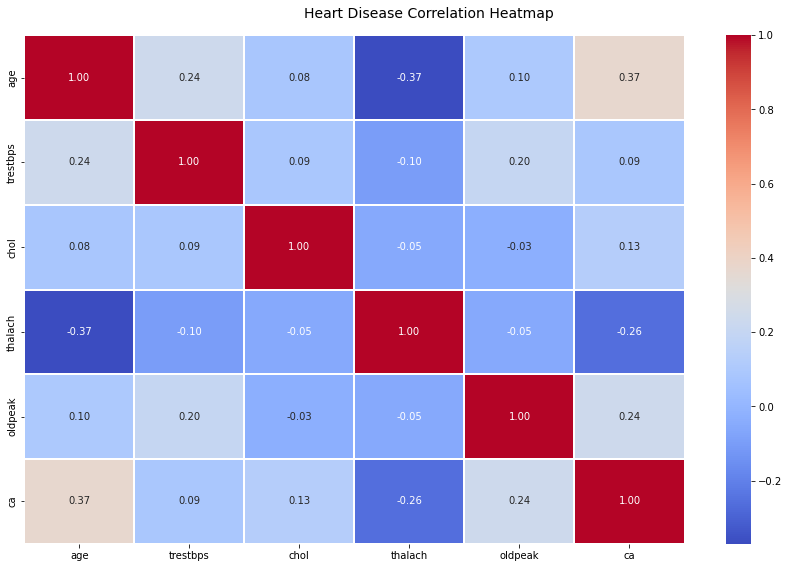

In [789]:
f, ax = plt.subplots(figsize=(12, 8))
corr = newData.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart Disease Correlation Heatmap', fontsize=14)

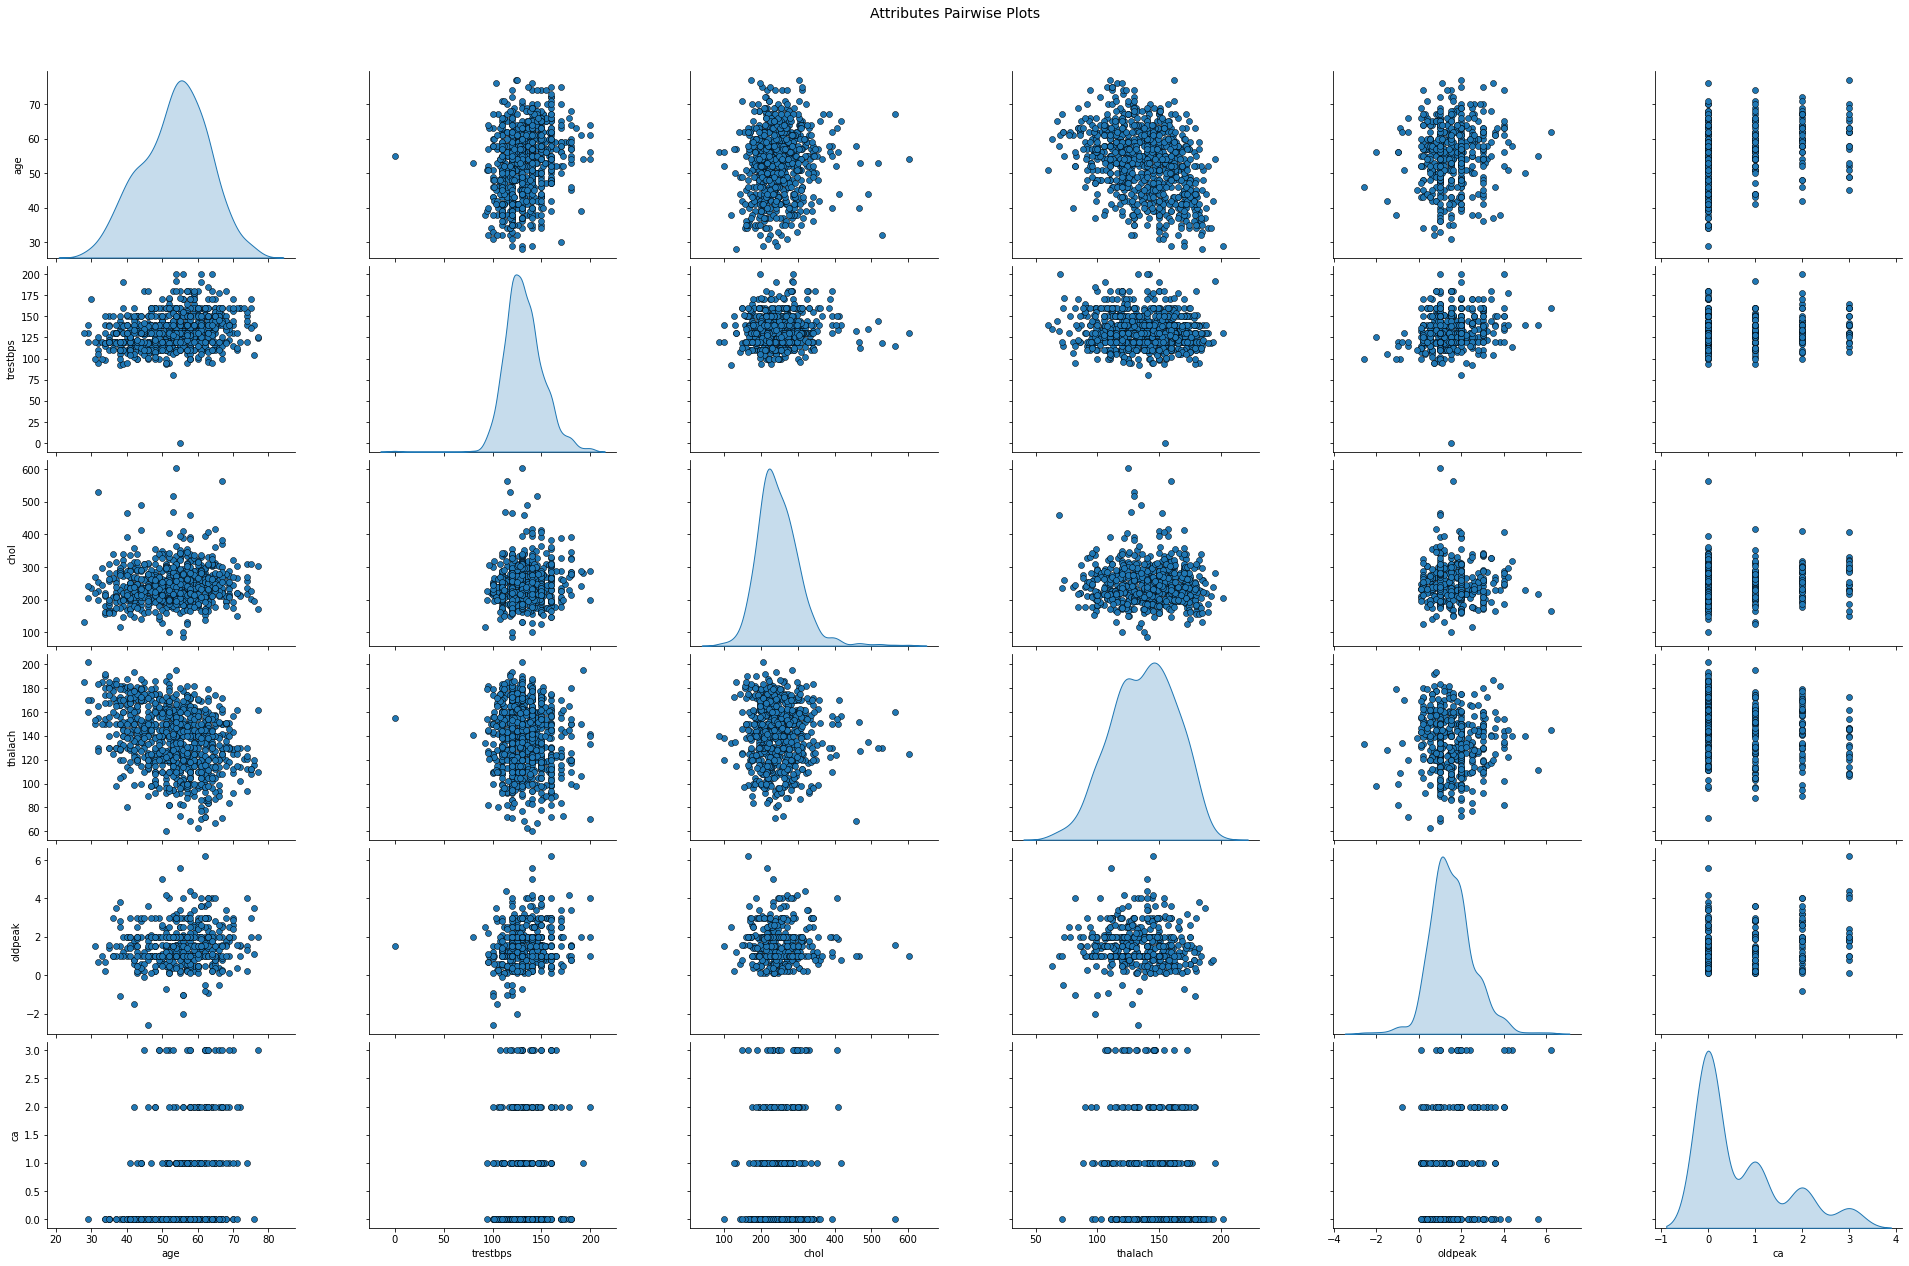

In [790]:
pp = sns.pairplot(newData[columnNames], height=3.0, aspect=1.5,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attributes Pairwise Plots', fontsize=14)

# Distribution

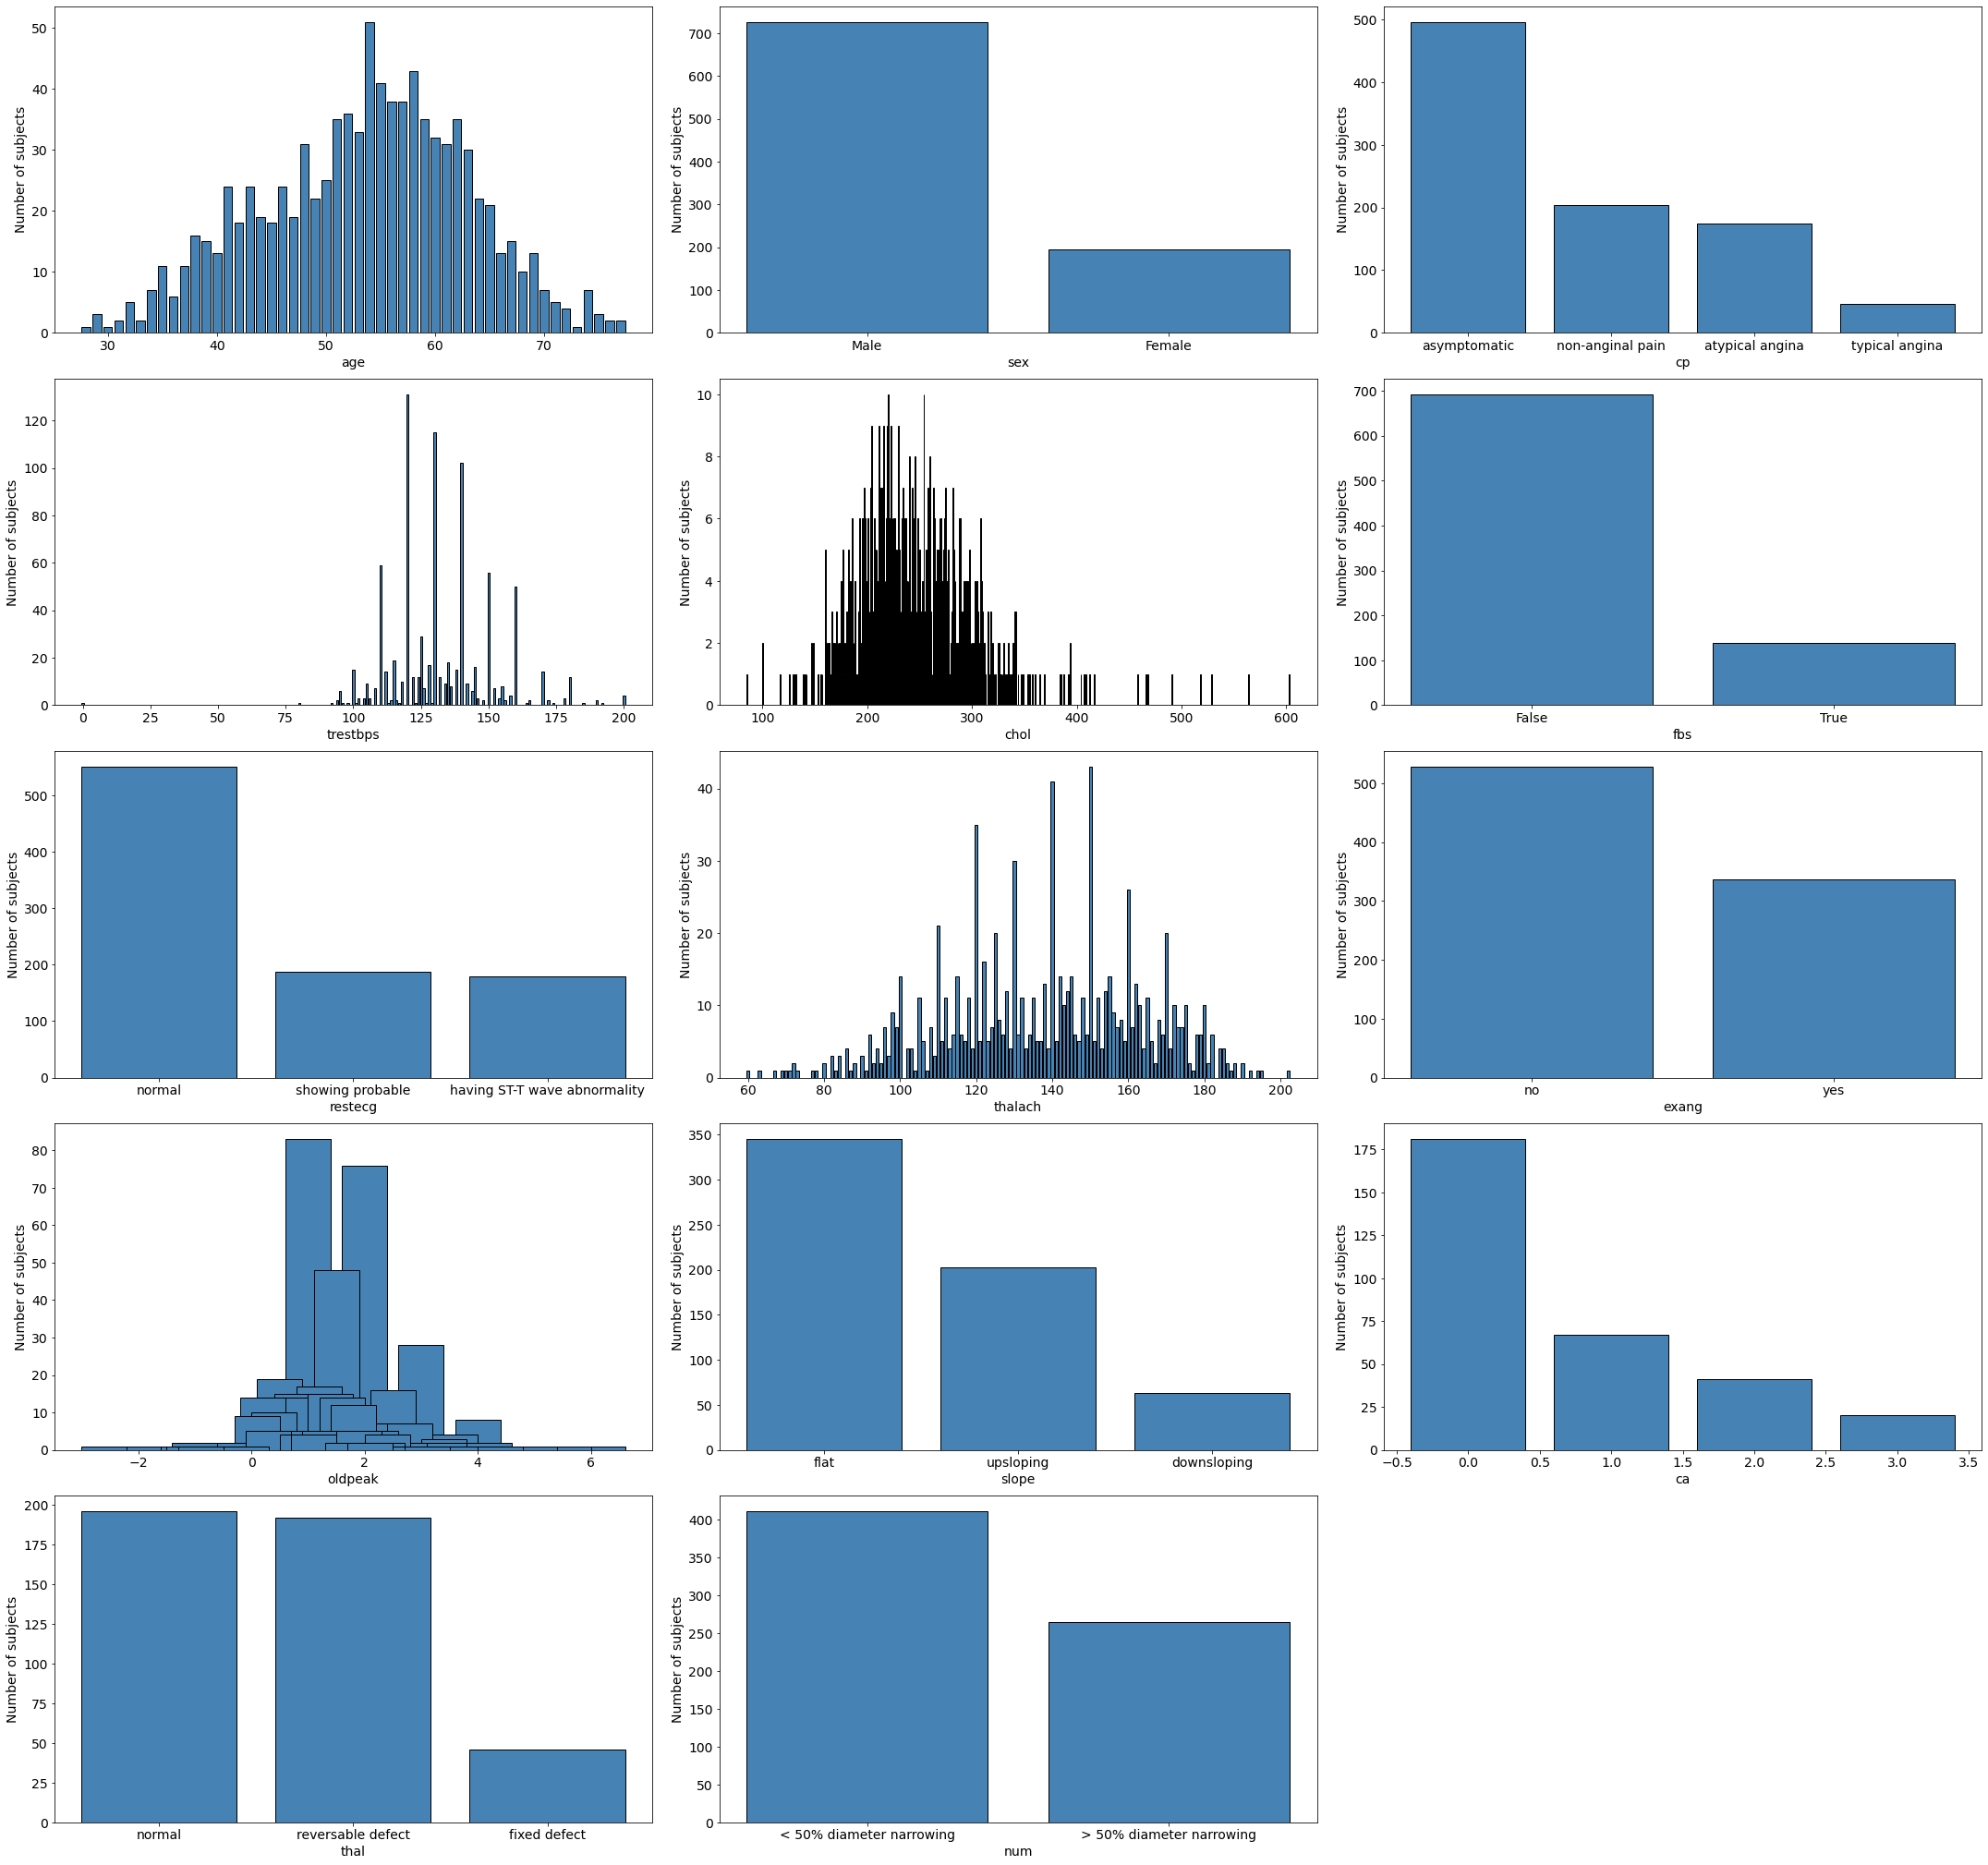

In [791]:
def printFigure(column, idx):
        ax = fig.add_subplot(9, 3, idx)
        ax.set_xlabel(column, size=14)
        ax.set_ylabel("Number of subjects", size=14) 
        w_q = newData[column].value_counts()
        w_q = (list(w_q.index), list(w_q.values))
        ax.tick_params(axis='both', which='major', labelsize=14)
        bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
                edgecolor='black', linewidth=1)

fig = plt.figure(figsize = (30, 50))
fig.subplots_adjust(top=0.9, wspace=0.2)

idx=1
for column in columnNames:
        printFigure(column, idx)
        idx+=1

### age / trestbps (maximum heart rate achieved)

Findings:
  The maximum heart rate is negative correlated with the age of subjects.
  This means that older subjets have a lower maximum heart rate than young subjets.


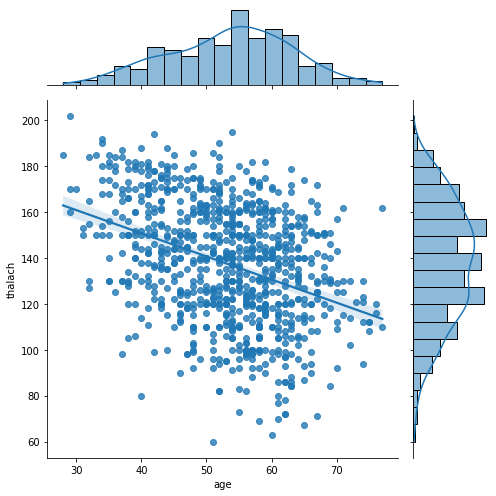

In [800]:
jp = sns.jointplot(x='age', y='thalach', data=data,
              kind='reg', space=0, height=7, ratio=4)

print("Findings:")
print("  The maximum heart rate is negative correlated with the age of subjects.")
print("  This means that older subjets have a lower maximum heart rate than young subjets.")

Findings:
  More men are diagnosed with heart disease than women.


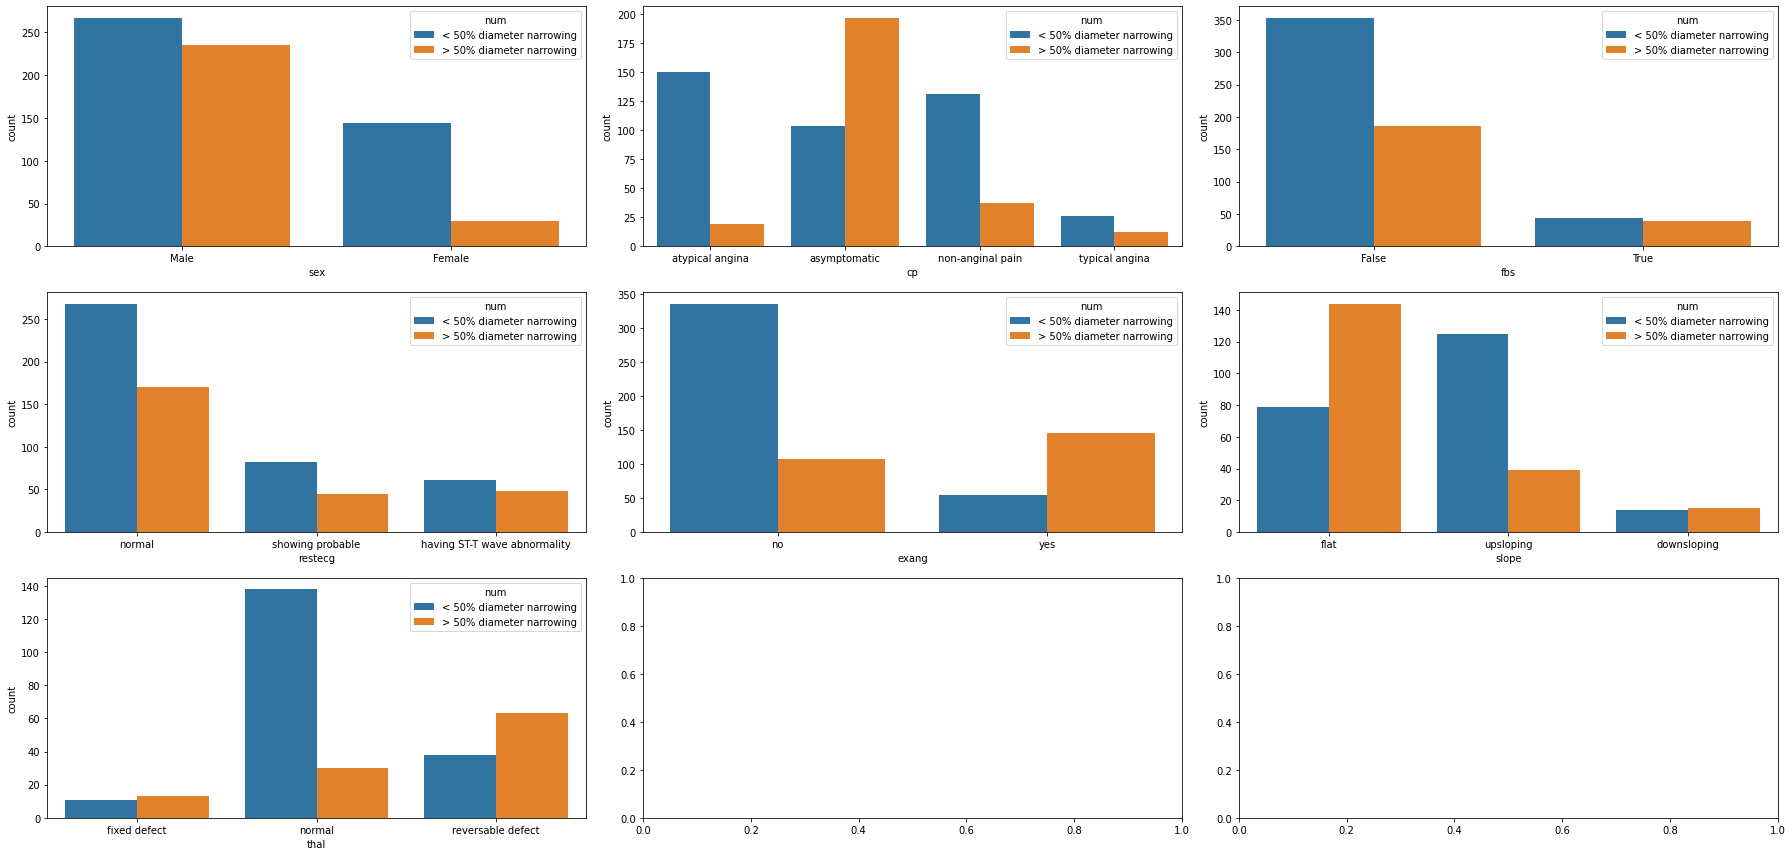

In [807]:

def printFigure(category_a, category_b, ax_idx):
    sns.countplot(x=category_a, hue=category_b, data=newData, ax=ax_idx)

comb = [
    ['sex', 'num'],
    ['cp', 'num'],
    ['fbs', 'num'],
    ['restecg', 'num'],
    ['exang', 'num'],
    ['slope', 'num'],
    ['thal', 'num'],
]

fig, ax =plt.subplots(3, 3, figsize=(25, 12))

idx_a=0
idx_b=0

for cat_a, cat_b in comb:
    if cat_a == cat_b:
        continue

    printFigure(cat_a, cat_b, ax[idx_b, idx_a%3])
    idx_a+=1
    if idx_a %3 ==0:
        idx_b+=1

print("Findings:")
print("  More men are diagnosed with heart disease than women.")

## Age / diagnosis of heart disease

Text(0, 0.5, 'age')

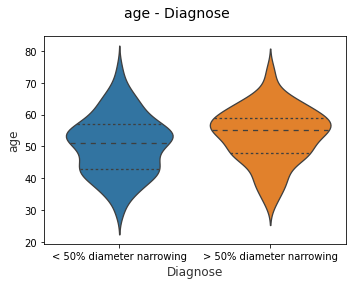

In [806]:
f, (ax1) = plt.subplots(1, figsize=(5, 4))
f.suptitle('age - Diagnose', fontsize=14)

sns.violinplot(x="num", y="age",
               data=newData, inner="quart", linewidth=1.3)
ax1.set_xlabel("Diagnose",size = 12,alpha=0.8)
ax1.set_ylabel("age",size = 12,alpha=0.8)

## Thalach (maximum heart rate achieved) / num (diagnosis of heart disease)

Text(0, 0.5, 'maximum heart rate achieved')

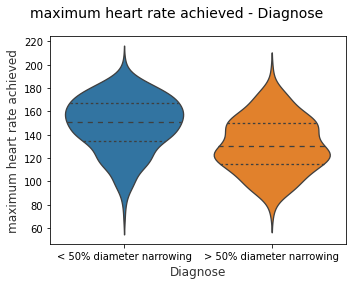

In [795]:
f, (ax1) = plt.subplots(1, figsize=(5, 4))
f.suptitle('maximum heart rate achieved - Diagnose', fontsize=14)

sns.violinplot(x="num", y="thalach",
               data=newData, inner="quart", linewidth=1.3)
ax1.set_xlabel("Diagnose",size = 12,alpha=0.8)
ax1.set_ylabel("maximum heart rate achieved",size = 12,alpha=0.8)

Text(0.5, 0, 'number of major vessels')

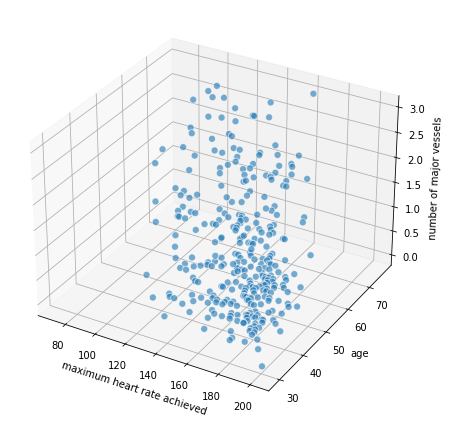

In [796]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = newData['thalach']
ys = newData['age']
zs = newData['ca']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('maximum heart rate achieved')
ax.set_ylabel('age')
ax.set_zlabel('number of major vessels')

Text(0.5, 1.05, 'Age - maximum heart rate achieved - number of major vessels')

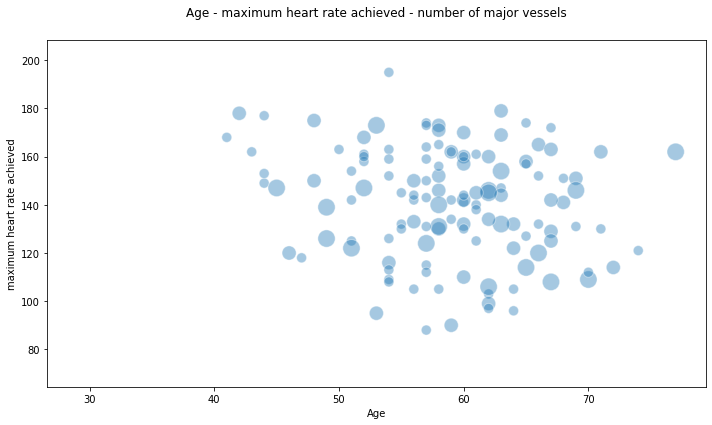

In [797]:
fig, ax =plt.subplots(1,1, figsize=(10, 6))

plt.scatter(newData['age'], newData['thalach'], s=newData['ca']*100, 
            alpha=0.4, edgecolors='w')

plt.xlabel('Age')
plt.ylabel('maximum heart rate achieved')
plt.title('Age - maximum heart rate achieved - number of major vessels',y=1.05)